In [18]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df = pd.read_csv('data/polished3_with_gdp.csv')

male = df[df["Sex"] == "M"]
female = df[df["Sex"] == "F"]

used_columns = ["Height", "BMI", "Age", "GDP"]

In [19]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = used_columns

scaler = StandardScaler()

male.loc[:, columns_to_normalize] = scaler.fit_transform(male[columns_to_normalize])
female.loc[:, columns_to_normalize] = scaler.fit_transform(female[columns_to_normalize])


In [20]:
male.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
0,1,A Dijiang,M,-0.311788,0.084312,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,False,0.412115,-0.786522
1,2,A Lamusi,M,-0.493359,-0.915257,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,False,-0.939024,-0.404309
2,12,Jyri Tapani Aalto,M,0.959212,-0.715343,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal,False,0.058037,0.757981
5,18,Timo Antero Aaltonen,M,0.959212,0.983925,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,No Medal,False,4.435092,0.757981
7,23,Fritz Aanes,M,-0.674930,0.784011,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No Medal,False,0.673312,1.648913


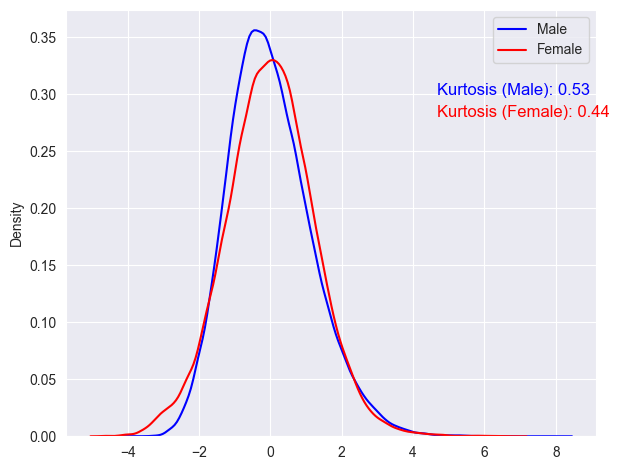

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import kurtosis

pca = PCA(n_components=1)
pca_male = pca.fit_transform(male[used_columns])
pca_female = pca.fit_transform(female[used_columns])

# Calculate kurtosis for male and female PCA results
kurt_male = kurtosis(pca_male.squeeze())
kurt_female = kurtosis(pca_female.squeeze())

# Create the plot
fig, ax = plt.subplots()
sns.kdeplot(data=pca_male.squeeze(), ax=ax, label='Male', color='blue')
sns.kdeplot(data=pca_female.squeeze(), ax=ax, label='Female', color='red')

# Add kurtosis annotations
ax.annotate(f'Kurtosis (Male): {kurt_male:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, color='blue')
ax.annotate(f'Kurtosis (Female): {kurt_female:.2f}', xy=(0.7, 0.75), xycoords='axes fraction', fontsize=12, color='red')

# Add legend and show plot
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
# Initialize a list to store results
results = []

unique_events = male['Event'].unique()
for event in unique_events:  
    male_event = male[male['Event'] == event][used_columns]

    pca_male = PCA(n_components=1).fit_transform(male_event)

    # Calculate kurtosis for both male and female PCA results
    kurt_male = kurtosis(pca_male.squeeze())

    # Append results
    results.append({
        'Event': event,
        'Kurtosis Male': kurt_male,
        'PCA': pca_male
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by kurtosis (you can choose to sort by either male or female kurtosis)
sorted_results = results_df.sort_values(by='Kurtosis Male', ascending=False)

# Display sorted results
sorted_results.reset_index(drop=True, inplace=True)
print(sorted_results)


                                        Event  Kurtosis Male  \
0            Weightlifting Men's Middleweight     101.480298   
1        Wrestling Men's Flyweight, Freestyle      37.461802   
2     Wrestling Men's Bantamweight, Freestyle      35.733999   
3                  Athletics Men's 100 metres      27.897755   
4                Judo Men's Extra-Lightweight      25.574657   
..                                        ...            ...   
218             Trampolining Men's Individual      -1.269761   
219  Canoeing Men's Kayak Singles, 200 metres      -1.327544   
220        Diving Men's Synchronized Platform      -1.339172   
221           Rugby Sevens Men's Rugby Sevens      -1.440818   
222     Diving Men's Synchronized Springboard      -1.453645   

                                                   PCA  
0    [[-0.5370842864370722], [-0.4041337809467714],...  
1    [[-0.5862372424494211], [0.11176230236000381],...  
2    [[0.14002460704574846], [-0.8516404813283469],...  
3  

In [14]:
# kayak = male[male["Event"] == "Diving Men's Synchronized Springboard"]
kayak = male[male["Event"] == "Weightlifting Men's Middleweight"]



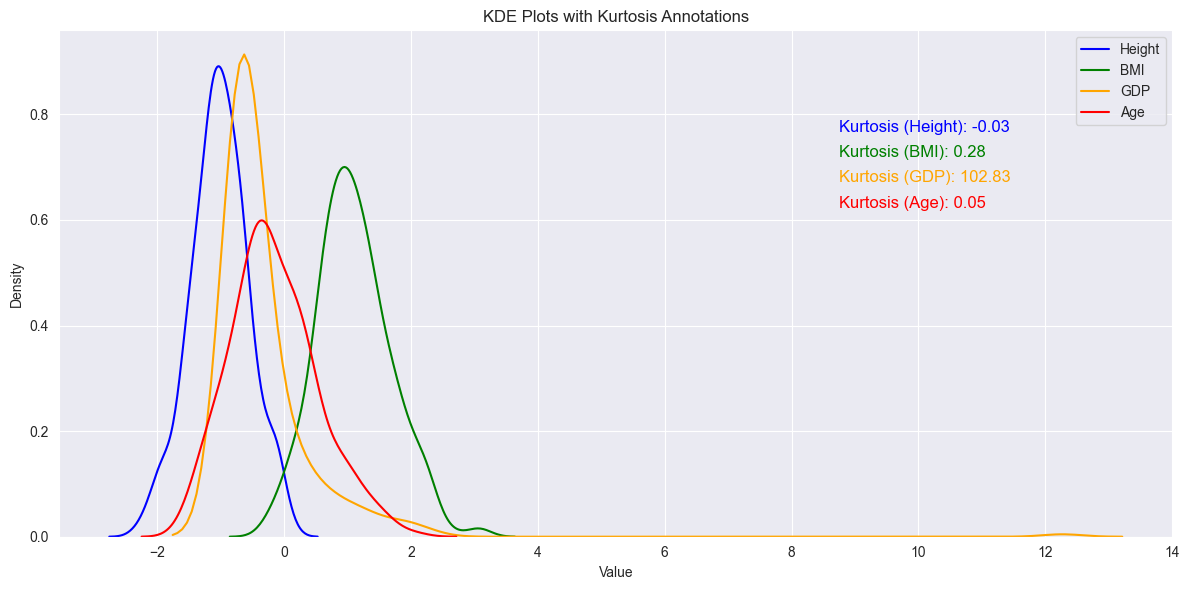

In [15]:
kurt_height_kayak = kurtosis(kayak['Height'].squeeze())
kurt_bmi_kayak = kurtosis(kayak['BMI'].squeeze())
kurt_gdp_kayak = kurtosis(kayak['GDP'].squeeze())
kurt_age_kayak = kurtosis(kayak['Age'].squeeze())

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot KDE for each variable
sns.kdeplot(data=kayak['Height'].squeeze(), ax=ax, label='Height', color='blue')
sns.kdeplot(data=kayak['BMI'].squeeze(), ax=ax, label='BMI', color='green')
sns.kdeplot(data=kayak['GDP'].squeeze(), ax=ax, label='GDP', color='orange')
sns.kdeplot(data=kayak['Age'].squeeze(), ax=ax, label='Age', color='red')

# Add kurtosis annotations
ax.annotate(f'Kurtosis (Height): {kurt_height_kayak:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, color='blue')
ax.annotate(f'Kurtosis (BMI): {kurt_bmi_kayak:.2f}', xy=(0.7, 0.75), xycoords='axes fraction', fontsize=12, color='green')
ax.annotate(f'Kurtosis (GDP): {kurt_gdp_kayak:.2f}', xy=(0.7, 0.70), xycoords='axes fraction', fontsize=12, color='orange')
ax.annotate(f'Kurtosis (Age): {kurt_age_kayak:.2f}', xy=(0.7, 0.65), xycoords='axes fraction', fontsize=12, color='red')

# Add legend and show plot
plt.legend()
plt.title('KDE Plots with Kurtosis Annotations')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [23]:
kayak.sort_values(by='GDP', ascending=True)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
105779,92471,Pe Aye,M,0.414498,-1.315084,74.0,Myanmar,MMR,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Middleweight,No Medal,False,1.155752,-0.815788
992,945,Mirza Adil,M,-1.582788,-0.215558,73.0,Sudan,SDN,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Middleweight,No Medal,False,-0.065846,-0.810467
77084,68025,Lee Jong-Seop,M,0.414498,-0.615386,75.0,South Korea,KOR,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Middleweight,No Medal,False,0.538612,-0.808974
54021,47800,Heo Chang-Beom,M,-0.493359,-0.215558,75.0,South Korea,KOR,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Middleweight,No Medal,False,0.153626,-0.808974
5902,5338,Mohammad Malik Arshad,M,-0.311788,-0.815300,74.5,Pakistan,PAK,1972 Summer,1972,Summer,Munich,Weightlifting,Weightlifting Men's Middleweight,No Medal,False,0.682529,-0.807242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94969,83128,Nico Mller,M,-0.674930,-1.115170,80.0,Germany,DEU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,No Medal,False,1.668092,1.884834
101408,88753,Jack Simon Oliver,M,-0.856502,-1.115170,77.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Middleweight,No Medal,False,1.302667,1.907995
8792,7825,Giovanni Battista Bardis,M,-0.856502,-0.215558,85.0,France,FRA,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Middleweight,No Medal,False,1.250984,2.101547
143521,125533,Chad Vaughn,M,0.414498,-0.915257,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Middleweight,No Medal,False,1.083278,2.297373
